# Breast Cancer Dataset Analysis

I will be analyzing a dataset about Breast Cancer remission. The target variable is predicting remission, so we will be performing binary classification. The data is categorical in nature. 

Win condition: AUROC Score of 80% or higher

Here is the citation:

Title: Breast cancer data (Michalski has used this)  

Sources:  
   -- Matjaz Zwitter & Milan Soklic (physicians)  
      Institute of Oncology  
      University Medical Center  
      Ljubljana, Yugoslavia  
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)  
   -- Date: 11 July 1988  

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [69]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [86]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.exceptions import NotFittedError

In [70]:
from sklearn.metrics import roc_auc_score

## Exploratory Analysis and Data Wrangling

From the included .names file:

Number of Instances: 286

Number of Attributes: 9 + the class attribute

Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor_size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv_nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg_malig: 1, 2, 3.
   8. breast: left, right.
   9. breast_quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat:	yes, no.

Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:  
   node_caps: 8  
   breast_quad: 1   

Class Distribution:
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances

In [2]:
# Importing data
df = pd.read_csv('breast-cancer.data', header=None, names=['target', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat'])
df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
df.dtypes

target         object
age            object
menopause      object
tumor_size     object
inv_nodes      object
node_caps      object
deg_malig       int64
breast         object
breast_quad    object
irradiat       object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16401e10>]],
      dtype=object)

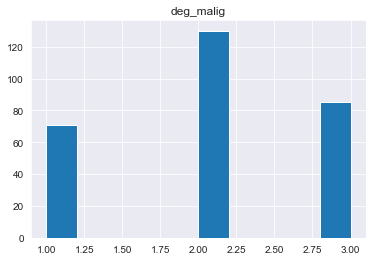

In [4]:
df.hist()

In [5]:
#change how missing data is labeled
mask_1 = df['node_caps'].str.contains('\?')

In [6]:
df.loc[mask_1,'node_caps'] = 'missing'
df['node_caps_missing'] = mask_1
df[mask_1]

,target,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing
145,no-recurrence-events,40-49,premeno,25-29,0-2,missing,2,left,right_low,yes,True
163,no-recurrence-events,60-69,ge40,25-29,3-5,missing,1,right,left_up,yes,True
164,no-recurrence-events,60-69,ge40,25-29,3-5,missing,1,right,left_low,yes,True
183,no-recurrence-events,50-59,ge40,30-34,9-11,missing,3,left,left_up,yes,True
184,no-recurrence-events,50-59,ge40,30-34,9-11,missing,3,left,left_low,yes,True
233,recurrence-events,70-79,ge40,15-19,9-11,missing,1,left,left_low,yes,True
263,recurrence-events,50-59,lt40,20-24,0-2,missing,1,left,left_up,no,True
264,recurrence-events,50-59,lt40,20-24,0-2,missing,1,left,left_low,no,True


In [7]:
mask_2 = df['breast_quad'].str.contains('\?')

In [8]:
df.loc[mask_2,'breast_quad'] = 'missing'
df['breast_quad_missing'] = mask_2
df[mask_2]

,target,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,missing,no,False,True


In [10]:
df['node_caps_missing'] = df['node_caps_missing'].astype(int)
df['breast_quad_missing'] = df['breast_quad_missing'].astype(int)

In [9]:
df.describe(include='object')

,target,age,menopause,tumor_size,inv_nodes,node_caps,breast,breast_quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


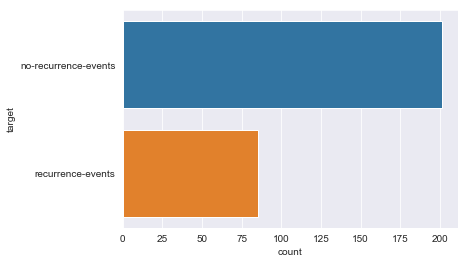

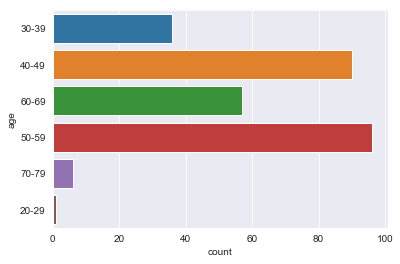

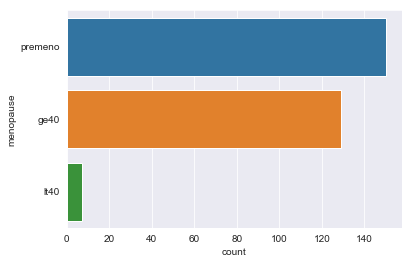

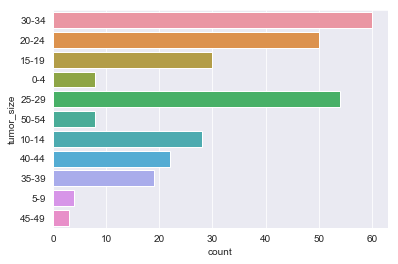

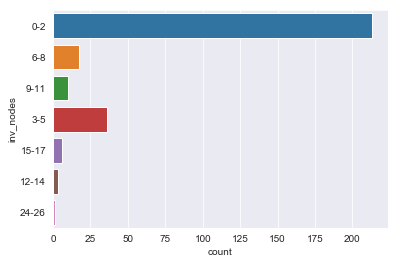

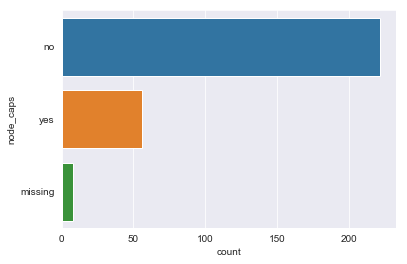

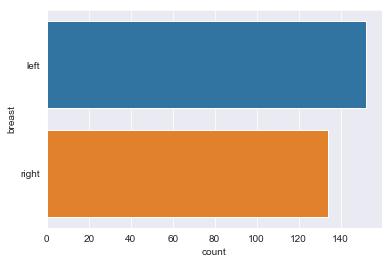

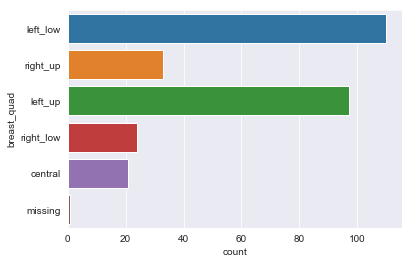

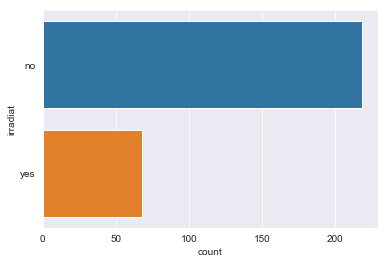

In [16]:
for column in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=df[column])
    plt.show()

There are sparse classes in these features: age, menopause, tumor_size, inv_nodes, breast_quad.

Because age, tumor_size, and inv_nodes are ordinal features we can handle the issue of sparse classes by changing those three features into integer values.

We can handle menopause feature by changing it to a binary feature: premenopause or not.

For the breast_quad data I'm going to combine the right_up, right_low, and central classes into a single 'other' class.

In [18]:
# Change age to an ordinal feature
df.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [21]:
age_map = {'20-29':1, '30-39':2, '40-49':3, '50-59':4, '60-69':5, '70-79':6}
df['age'] = df.age.replace(age_map)
df.age.head()

0    2
1    3
2    3
3    5
4    3
Name: age, dtype: int64

In [23]:
# Change tumor_size to an ordinal feature
df.tumor_size.unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [24]:
tumor_size_map = {'0-4':1, '5-9':2, '10-14':3,'15-19':4,'20-24':5,'25-29':6,'30-34':7,'35-39':8,'40-44':9,'45-49':10,'50-54':11}
df['tumor_size'] = df.tumor_size.replace(tumor_size_map)
df.tumor_size.head()

0    7
1    5
2    5
3    4
4    1
Name: tumor_size, dtype: int64

In [27]:
# change inv_nodes to ordinal feature
df.inv_nodes.unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [28]:
inv_nodes_map = {'0-2':1, '3-5':2,'6-8':3, '9-11':4, '12-14':5, '15-17':6, '18-20':7, '21-23':8, '24-26':9}
df['inv_nodes'] = df.inv_nodes.replace(inv_nodes_map)
df.inv_nodes.head()

0    1
1    1
2    1
3    1
4    1
Name: inv_nodes, dtype: int64

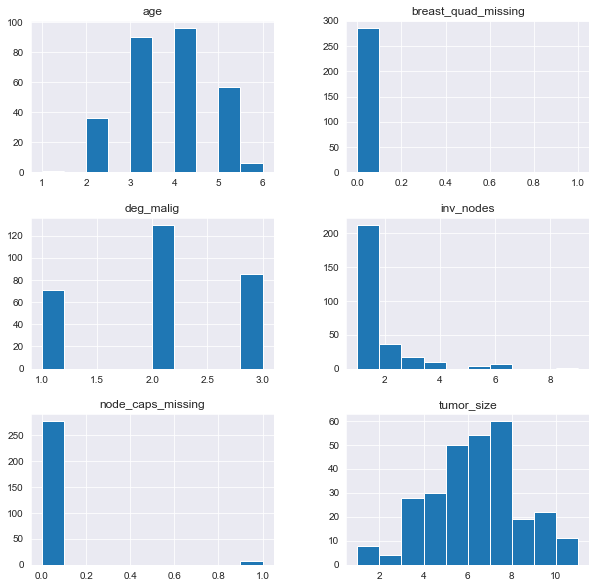

In [31]:
df.hist(figsize=(10,10))
plt.show()

In [38]:
df['premeno'] = df.menopause=='premeno'
df['premeno'] = df.premeno.astype(int)
df.premeno.head()
df.drop(columns=['menopause'], inplace=True)

0    1
1    1
2    1
3    0
4    1
Name: premeno, dtype: int64

In [45]:
df.head()

,target,age,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing,premeno
0,no-recurrence-events,2,7,1,0,3,left,left_low,0,0,0,1
1,no-recurrence-events,3,5,1,0,2,right,right_up,0,0,0,1
2,no-recurrence-events,3,5,1,0,2,left,left_low,0,0,0,1
3,no-recurrence-events,5,4,1,0,2,right,left_up,0,0,0,0
4,no-recurrence-events,3,1,1,0,2,right,right_low,0,0,0,1


In [42]:
# change yes and no classes to integer values
df['node_caps'] = df.node_caps.replace({'no':0, 'yes':1})
df['irradiat'] = df.irradiat.replace({'no':0, 'yes':1})

In [54]:
# rename ordinal features
rename_ordinal_map = {
    'age' : 'age_ordinal',
    'tumor_size' : 'tumor_size_ordinal',
    'inv_nodes' : 'inv_nodes_ordinal'
}
df.rename(columns = rename_ordinal_map, inplace=True)

In [53]:
# rename target and change to 0s and 1s
df.rename(columns={'target':'no_recurrence'}, inplace=True)
df['no_recurrence'] = df.no_recurrence.replace({'no-recurrence-events':1, 'recurrence-events':0})

In [55]:
# replacing sparse classes in breast_quad with 'other'
df.breast_quad.unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central',
       'missing'], dtype=object)

In [57]:
df.replace(['right_up','right_low', 'central'], 'other', inplace=True)

In [58]:
df.head()

,no_recurrence,age_ordinal,tumor_size_ordinal,inv_nodes_ordinal,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing,premeno
0,1,2,7,1,0,3,left,left_low,0,0,0,1
1,1,3,5,1,0,2,right,other,0,0,0,1
2,1,3,5,1,0,2,left,left_low,0,0,0,1
3,1,5,4,1,0,2,right,left_up,0,0,0,0
4,1,3,1,1,0,2,right,other,0,0,0,1


In [59]:
df.dtypes

no_recurrence           int64
age_ordinal             int64
tumor_size_ordinal      int64
inv_nodes_ordinal       int64
node_caps              object
deg_malig               int64
breast                 object
breast_quad            object
irradiat                int64
node_caps_missing       int64
breast_quad_missing     int64
premeno                 int64
dtype: object

In [65]:
# since get dummies will handle the missing columns I'm going to remove them first so that I don't have duplicate data
df.drop(columns = ['node_caps_missing', 'breast_quad_missing'], inplace=True)

In [68]:
df.head()

,no_recurrence,age_ordinal,tumor_size_ordinal,inv_nodes_ordinal,node_caps,deg_malig,breast,breast_quad,irradiat,premeno
0,1,2,7,1,0,3,left,left_low,0,1
1,1,3,5,1,0,2,right,other,0,1
2,1,3,5,1,0,2,left,left_low,0,1
3,1,5,4,1,0,2,right,left_up,0,0
4,1,3,1,1,0,2,right,other,0,1


In [66]:
abt = pd.get_dummies(df, columns=['node_caps', 'breast', 'breast_quad'])

In [67]:
abt.head()

,no_recurrence,age_ordinal,tumor_size_ordinal,inv_nodes_ordinal,deg_malig,irradiat,premeno,node_caps_0,node_caps_1,node_caps_missing,breast_left,breast_right,breast_quad_left_low,breast_quad_left_up,breast_quad_missing,breast_quad_other
0,1,2,7,1,3,0,1,1,0,0,1,0,1,0,0,0
1,1,3,5,1,2,0,1,1,0,0,0,1,0,0,0,1
2,1,3,5,1,2,0,1,1,0,0,1,0,1,0,0,0
3,1,5,4,1,2,0,0,1,0,0,0,1,0,1,0,0
4,1,3,1,1,2,0,1,1,0,0,0,1,0,0,0,1


## Training and Evaluating Models

In [71]:
y = abt.no_recurrence
X = abt.drop(['no_recurrence'], axis=1)

In [72]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.33, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(191, 15) (95, 15) (191,) (95,)


In [73]:
# creating pipelines for logistic regression using l1 and l2 regularization
# creating pipelines for randomforest and gradientboosting classifiers
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [75]:
# setting hyperparameters for l1 and l2 logistic regression
l1_hyperparameters = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

In [82]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33, 0.5],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

In [77]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [84]:
# setting up hyperparameters dictionary for pipeline workflow
hyperparameters = {
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'rf':rf_hyperparameters,
    'gb':gb_hyperparameters
}

In [85]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1 has been fitted.


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted.


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.
gb has been fitted.


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [87]:
for name, model in fitted_models.items():
    print(name, type(model))

l1 <class 'sklearn.model_selection._search.GridSearchCV'>
l2 <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [88]:
for name, model in fitted_models.items():
    try:
        model.predict(X_test)
        print(name, 'can be predicted.')
    except NotFittedError as e:
        print(repr(e))

l1 can be predicted.
l2 can be predicted.
rf can be predicted.
gb can be predicted.


In [89]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.7225130890052356
l2 0.7172774869109948
rf 0.7486910994764397
gb 0.7329842931937173


In [94]:
for name, model in fitted_models.items():
    pred_prob = model.predict_proba(X_test)
    pred_prob = [p[1] for p in pred_prob]
    print(f'{name} AUROC Score: {roc_auc_score(y_test, pred_prob):.5f}')

l1 AUROC Score: 0.67884
l2 AUROC Score: 0.70469
rf AUROC Score: 0.68497
gb AUROC Score: 0.71908


## Analysis 

We failed against our win condition of an AUROC score over .8

Our best score was .72 for the gradient boosting algorithm. l2 logistic regression was also close with and AUROC score of .705

To improve our score we could keep fine tuning the hyperparameters or try a deep learning algorithm.

In [96]:
fitted_models['gb'].best_estimator_.named_steps['gradientboostingclassifier']

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=123,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [95]:
fitted_models['l2'].best_estimator_.named_steps['logisticregression']

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

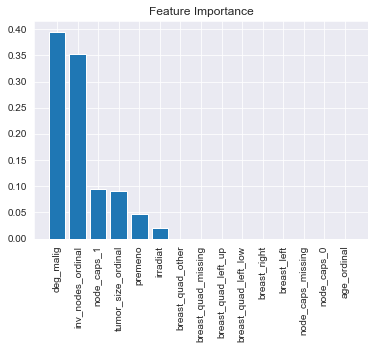

In [105]:
# looking at feature importances of our Gradient Boosting Classifier
importances = fitted_models['gb'].best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
import_ind = np.argsort(importances)[::-1]
ind_names = [X.columns[i] for i in import_ind]
plt.figure()
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[import_ind])
plt.xticks(range(X.shape[1]), ind_names, rotation=90)
plt.show()

Degree of malignancy and number of invasive nodes were the two most important features. This makes some intuitive sense against what we would expect. Breast quad and Breast left vs. right made no contribution so it might be worth getting rid of them as features if we run this again, especially if we could get more total data by leaving those features out. 